# **Presentación del proyecto**

**Modelo para predicción de Baja de Cuenta**

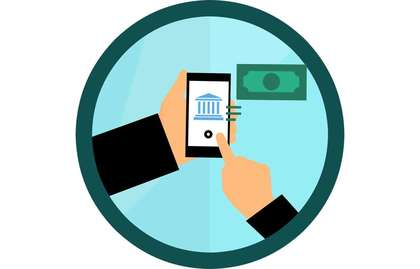

**Contexto Comercial y Analítico**

En un entorno empresarial, se plantea la necesidad de prevenir que los clientes cierren las cuentas de bancos,lo cual es una perdida para ellos. Surge la pregunta de si, con variables asi como estado civil y transacciones del mismo cliente, es posible predecir el cierre de cuenta.

El conjunto de datos, consta de 19 características sobre el cliente y su uso de targeta, estas incluyen edad, sexo, tiempo de no uso, limite de credito, entre otras.

Haciendo un anlisis exploratorio de datos y utilizando técnicas de machine learning, se busca construir un modelo que pueda predecir el cierre de cuentas. La idea es proporcionar a los bancos una herramienta para la prevención y el manejo efectivo de la cuenta.

**Fuente**

https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/data

**Preguntas/Hipótesis a Resolver mediante el Análisis de Datos**

Dadas ciertas características como historial crediticio, el estado civil de un cliente, es posible predecir si esa persona tiene un riesgo de dejar su targeta de credito.

**Objetivo**

El objetivo principal del proyecto es desarrollar un modelo de machine learning que pueda predecir con precisión la probabilidad de que una persona cierre su cuenta basándose en diversas características como actividad de targeta y estado civil, credito entre otras.

Para lograr este objetivo, podríamos utilizar un enfoque de clasificación binaria, donde el modelo intentará predecir si un cliente cerro su cuenta o no cerro su cuenta esto con la variable objetivo Attrition_Flag (1 si el cliente cerro la cuenta y 0 si no cerro la cuenta).

Un modelo adecuado para implementar es Logistic Regression, podriamos tambien probar otros como KNN, Random Forest o Support Vector Machines.

# **Instalacion de librerias**

In [ ]:
! pip install chart_studio

In [ ]:
! pip install bqplot
! pip install pingouin

# **Lectura de datos**

**Librerias necesarias para el analisis de datos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")

from   scipy import stats
import statsmodels.formula.api as sm
import chart_studio.plotly     as py
# https://community.plot.ly/t/solved-update-to-plotly-4-0-0-broke-application/26526/2
import os

#%matplotlib inline
#plt.style.use('ggplot')
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
import pingouin
bokeh.io.output_notebook(INLINE)

**Lectura del dataset**

In [ ]:
Banco=pd.read_csv("https://raw.githubusercontent.com/YadielCortes/DataSciencie/main/BankChurners.csv")

**Análisis inicial del dataset**

In [ ]:
Banco.shape

(10127, 23)

In [ ]:
Banco.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
Banco.sample(7)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
8403,711922158,Existing Customer,57,F,2,Graduate,Married,Less than $40K,Blue,45,...,1860.0,0,1860.0,0.778,5109,62,0.722,0.000,0.000303,0.999700
9653,718528008,Existing Customer,60,F,1,High School,Married,Less than $40K,Blue,47,...,3845.0,1460,2385.0,0.857,14432,106,0.828,0.380,0.000099,0.999900
6454,714250908,Attrited Customer,53,F,2,Graduate,Married,Less than $40K,Blue,47,...,2927.0,2517,410.0,0.419,2231,60,0.875,0.860,0.995420,0.004578
3595,778968408,Existing Customer,39,M,2,Doctorate,Single,$60K - $80K,Blue,27,...,5341.0,0,5341.0,0.771,1955,47,0.808,0.000,0.000134,0.999870
9192,713705358,Existing Customer,37,M,2,Graduate,Single,$60K - $80K,Blue,28,...,7349.0,994,6355.0,0.864,13970,109,0.847,0.135,0.000086,0.999910
4427,816864483,Existing Customer,39,F,4,Uneducated,Single,$40K - $60K,Blue,34,...,10264.0,803,9461.0,0.802,4003,74,0.721,0.078,0.000123,0.999880
1534,811467708,Existing Customer,33,M,2,Graduate,Married,$80K - $120K,Blue,28,...,22399.0,1431,20968.0,1.019,2390,62,0.722,0.064,0.000114,0.999890


In [ ]:
Banco.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [ ]:
Banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
Banco.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

##**Descripción de variables**

- CLIENTNUM: Numero de cliente
- Attrition_Flag: Variable de evento interno (actividad del cliente): si la cuenta está cerrada, entonces 1 o 0
- Gender: Variable demográfica - M=Hombre, F=Mujer
- Customer_Age: Edad
- Dependent_count: Recuento de dependientes
- Education_Level: Nivel de educación
- Marital_Status: Estado civil
- Income_Category: Salario que percibe
- Card_Category: Categoria de targeta (Blue, Silver, Gold, Platinum)
- Months_on_book: Periodo con relacion con el banco
- Total_Relationship_Count: Número total de productos en poder del cliente
- Months_Inactive_12_mon: Nº de meses inactivos en los últimos 12 meses
- Contacts_Count_12_mon: Nº de Contactos en los últimos 12 meses
- Credit_Limit: Límite de crédito en la tarjeta de crédito
- Total_Revolving_Bal: Saldo rotatorio total de la tarjeta de crédito
- Avg_Open_To_Buy: Línea de Crédito Abierta para Comprar (Promedio de los últimos 12 meses)
- Total_Amt_Chng_Q4_Q1: Cambio en el monto de la transacción (cuarto trimestre respecto al primer trimestre)
- Total_Trans_Amt: Monto total de la transacción (últimos 12 meses)
- Total_Trans_Ct: Recuento total de transacciones (últimos 12 meses)
- Total_Ct_Chng_Q4_Q1: Cambio en el recuento de transacciones (cuarto trimestre respecto al primer trimestre)
- Avg_Utilization_Ratio: Índice de utilización promedio de la tarjeta

In [ ]:
Banco.dtypes.value_counts()

,count
int64,10
float64,7
object,6


In [ ]:
Banco.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,7.080821e+08,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,2.600000e+01,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,1.300000e+01,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1.438300e+03,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.000000e+00,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.000000e+00,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [ ]:
Banco.describe(include=['object']).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


# **Limpieza y transformación de datos**

**Cambio de variables**

In [ ]:
Banco.rename(columns={"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1":"Naive_Bayes_1"},inplace=True)
Banco.rename(columns={"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2":"Naive_Bayes_2"},inplace=True)

In [ ]:
female = Banco.loc[(Banco.Customer_Age.notnull())&(Banco['Gender']=="F"), 'Customer_Age']
male = Banco.loc[(Banco.Customer_Age.notnull())&(Banco['Gender']=="M"), 'Customer_Age']

In [ ]:
Banco.duplicated().sum()

0

In [ ]:
# Convertir 'Yes' a 1 y 'No' a 0
Banco['Attrition_Flag'] = Banco['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

print(Banco)

       CLIENTNUM  Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383               0            45      M                3   
1      818770008               0            49      F                5   
2      713982108               0            51      M                3   
3      769911858               0            40      F                4   
4      709106358               0            40      M                3   
...          ...             ...           ...    ...              ...   
10122  772366833               0            50      M                2   
10123  710638233               1            41      M                2   
10124  716506083               1            44      F                1   
10125  717406983               1            30      M                2   
10126  714337233               1            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     

In [ ]:
Banco.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


In [ ]:
Banco.fillna(Banco)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_1,Naive_Bayes_2
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,1,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


**Valores outliers**

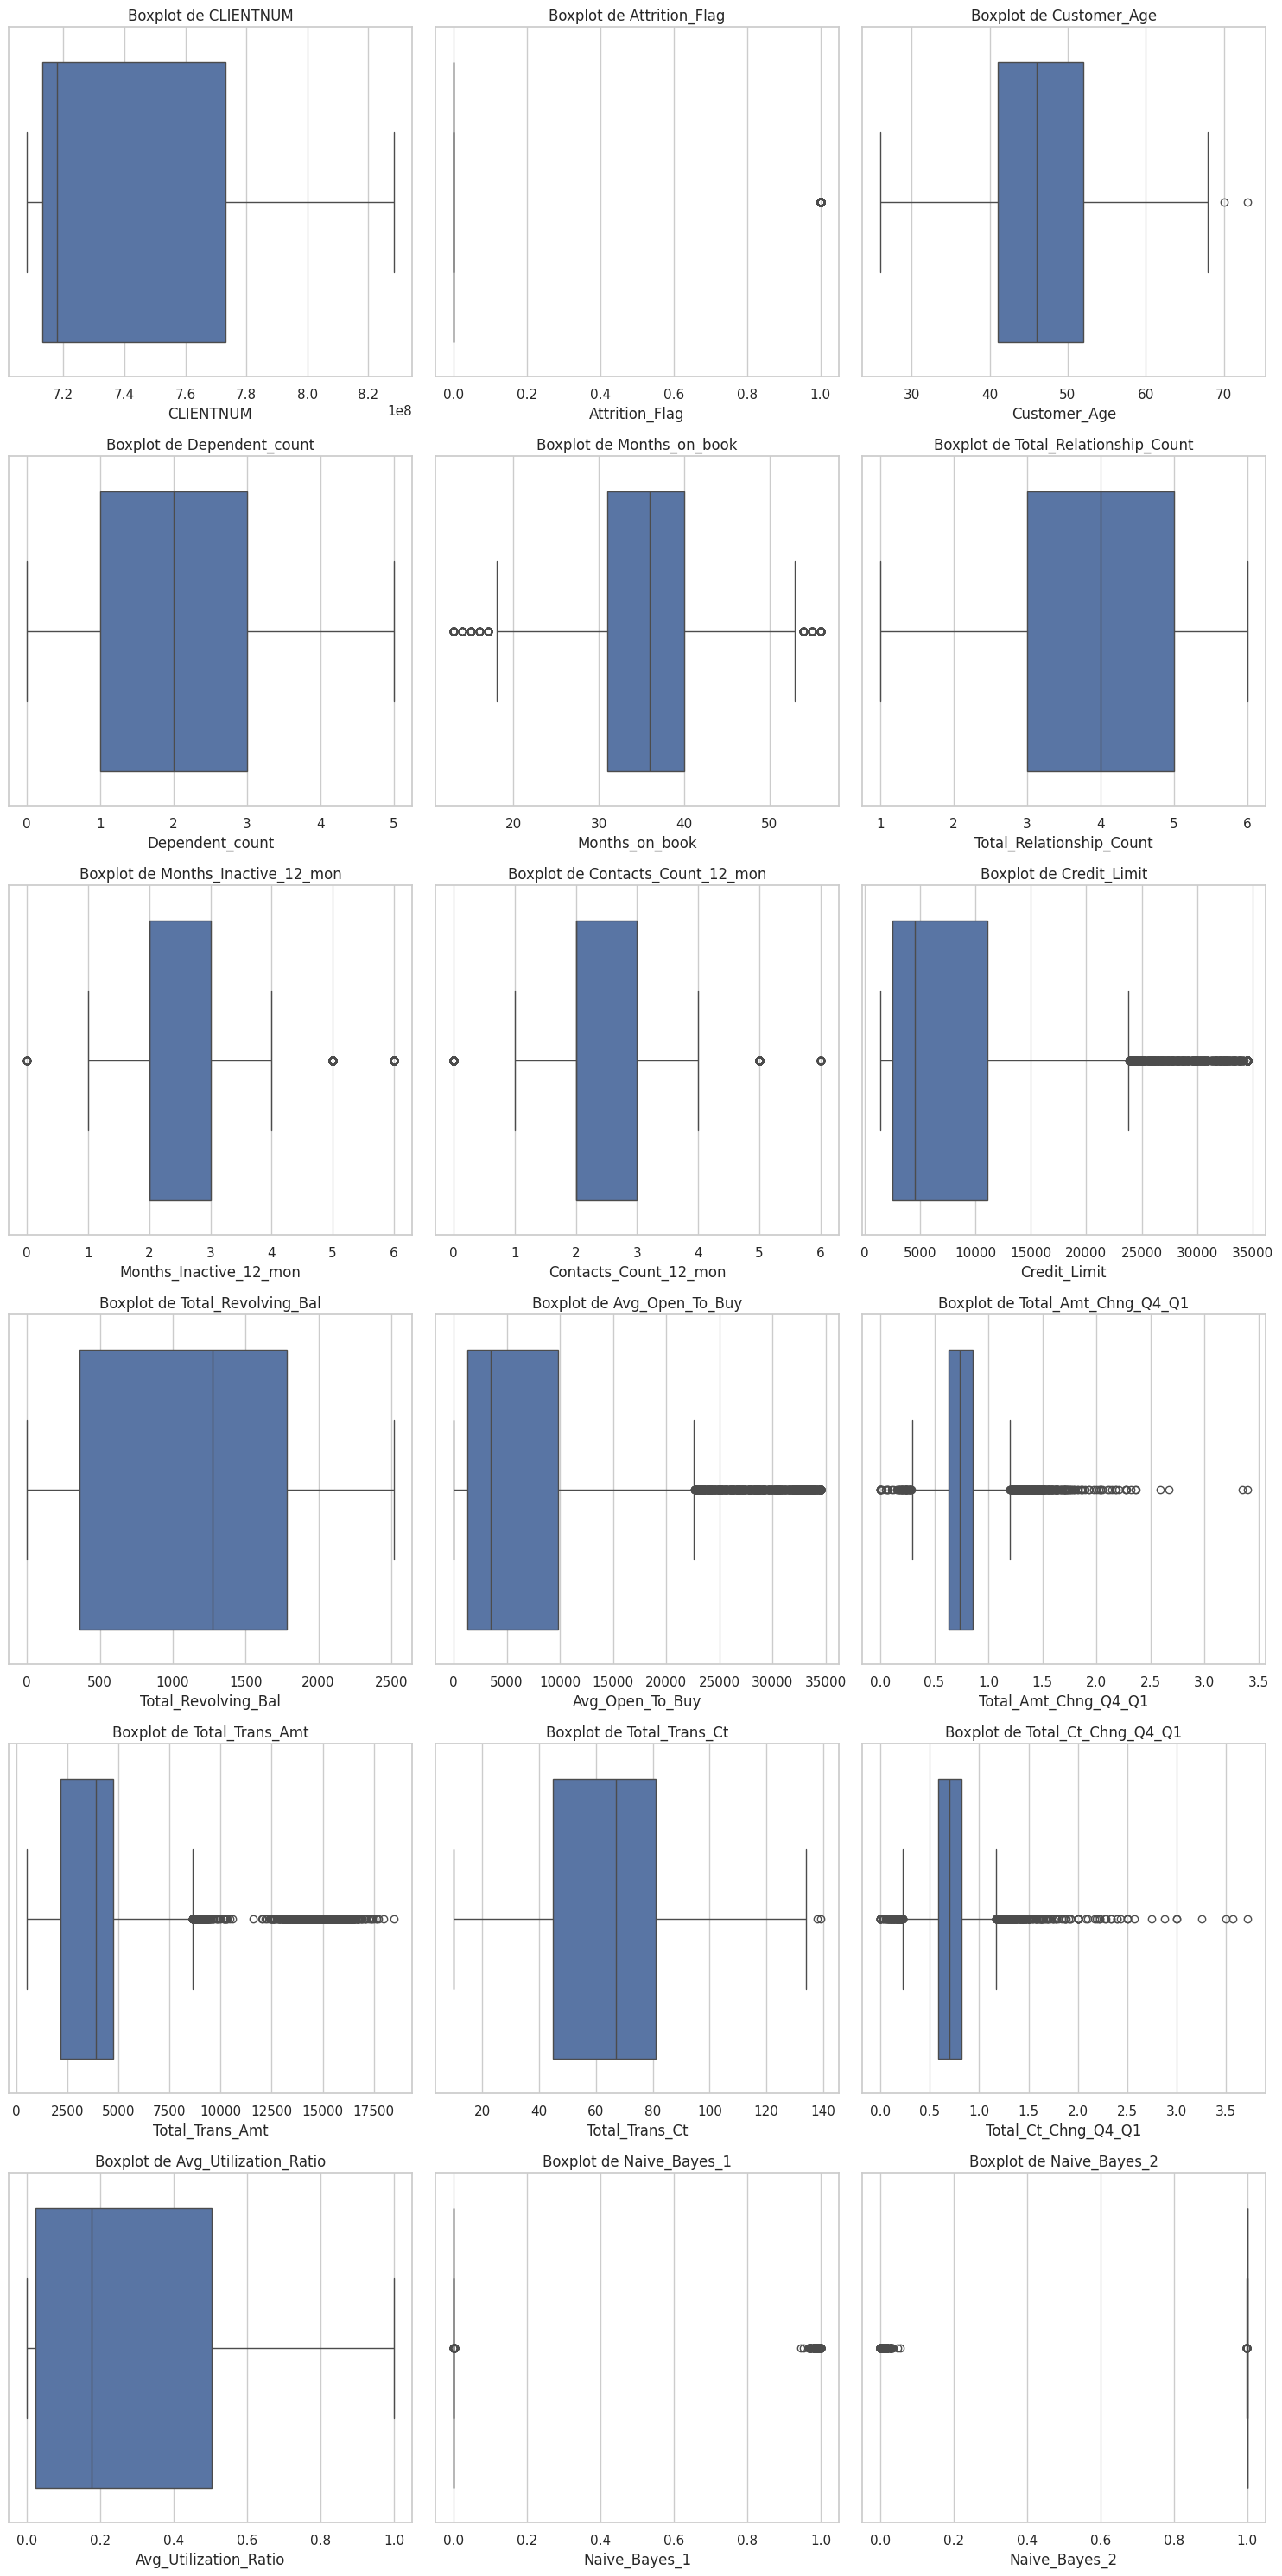

In [ ]:
numeric_columns = Banco.select_dtypes(include=['int64', 'float64'])

# Calcular el número de filas y columnas para los subgráficos
num_vars = len(numeric_columns.columns)
num_rows = (num_vars // 3) + (1 if num_vars % 3 > 0 else 0)
num_cols = min(num_vars, 3)

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 5*num_rows))

# Generar y mostrar los diagramas de caja para cada variable numérica
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(x=Banco[col])
    plt.title("Boxplot de {}".format(col))
    plt.tight_layout()

plt.show()

# **Análisis Exploratorio de datos**

**Análisis univariado**

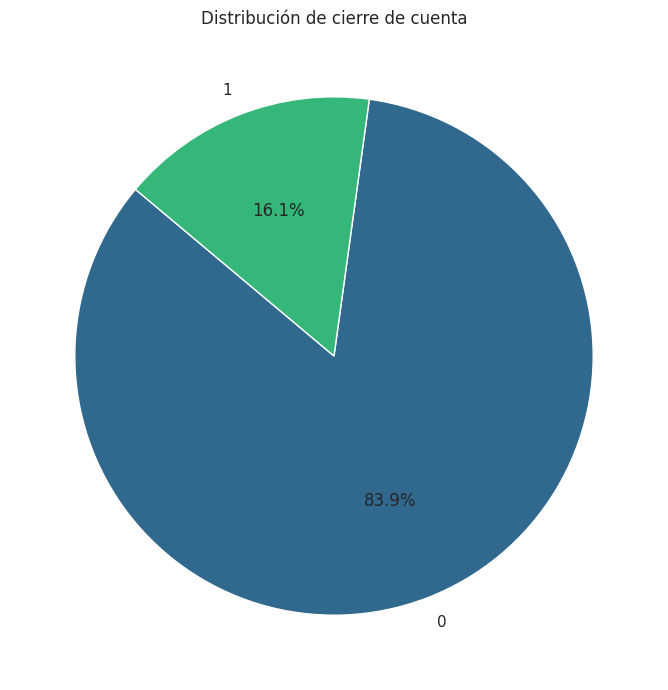

In [ ]:
gender_counts = Banco['Attrition_Flag'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(gender_counts)))

plt.title('Distribución de cierre de cuenta')

plt.show()

Esta grafica de pastel nos deja observar cual es el porcentaje de cuantas cerradas, poor lo que se puede observar el porcentaje es algo alto ya que tenemos un 16% de cuntas cerradas en todo el dataset, a mi parecer este porcentaje deberia de ser mas bajo pra que no afecte al banco.

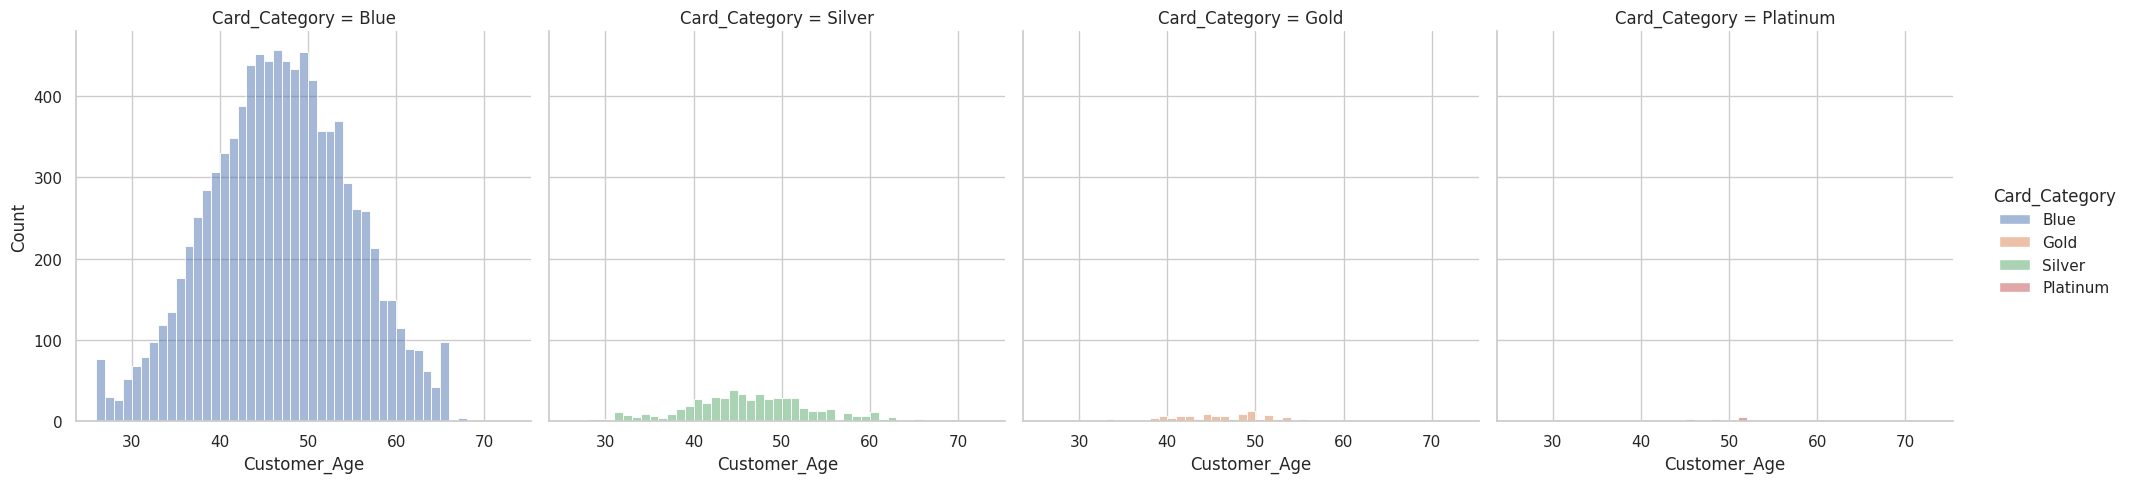

In [ ]:
sns.displot(Banco, x='Customer_Age', hue='Card_Category', col='Card_Category',col_order=["Blue","Silver","Gold","Platinum"],binwidth=1)

Tenemos una tabla que nos da la comparativa de la edad del cliente y de el tipo de targeta que tiene, asimple vista podemos observar que es muy poca gente la que tiene las targetas gold y platinum y estre esa genta ya esta arriba de las 40 años, caso ocontrario de la targeta basica blue que hay de todo tipoo de edades y es donde se concentra mas las personas.

In [ ]:
Banco["Card_Category"].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [ ]:
Banco_3 = Banco[["CLIENTNUM", "Card_Category"]].groupby("Card_Category").count()
Banco_3

,CLIENTNUM
Card_Category,
Blue,9436
Gold,116
Platinum,20
Silver,555


Text(0.5, 1.0, 'Distribución de clientes por tarjeta')

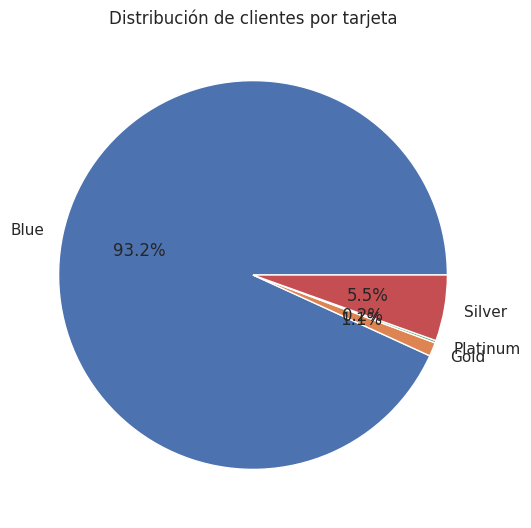

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(Banco_3["CLIENTNUM"], labels=Banco_3.index, autopct='%1.1f%%')
ax.set_title('Distribución de clientes por tarjeta')
#

aqui confiirmamos la dicho en la anterios grafica la targeta blue es las que mas clientes tienen arrazando con un 93.2 poorciento del total del dataset.

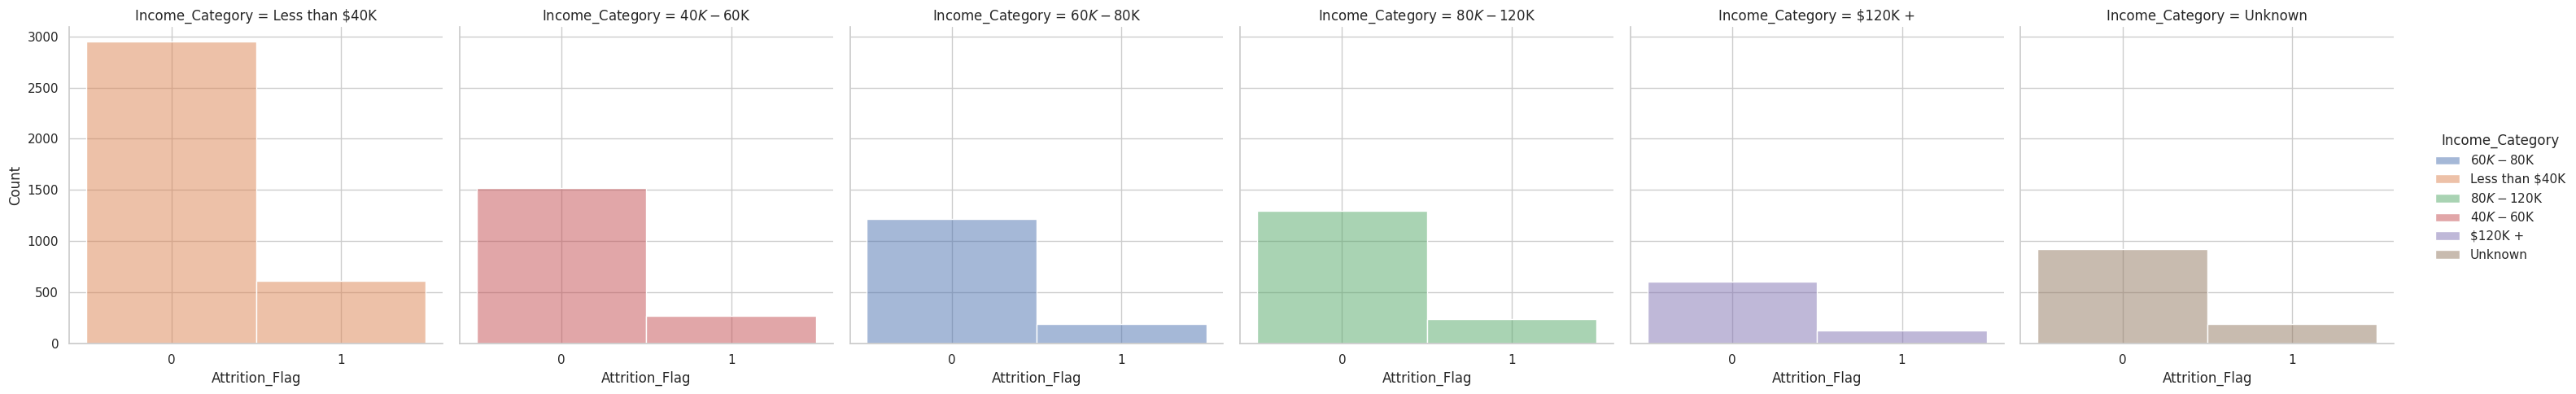

In [ ]:
n=sns.displot(Banco, x='Attrition_Flag', hue='Income_Category', col='Income_Category', col_order=["Less than $40K","$40K - $60K","$60K - $80K","$80K - $120K","$120K +","Unknown"] ,binwidth=None,bins=[-0.5,0.5,1.5])
# Girar las etiquetas del eje x
for ax in n.axes.flat:
    ax.set_xticks([0, 1])  # Ajustar los ticks del eje x para mostrar solo 0 y 1
    ax.set_xticklabels(['0', '1'])

plt.show()

En la grafica podemos observar que el enor ingreso es el que tiene las mayor cantidad de cuentas activas y tambien es el que cierra mas cuentas, por lo que podemos decir que ahi es donde se concetra el dataset, esta tambien podemos llegar a la conclucion de que las peprsonas que tienen mas dinero no ocupan targetas de credito.

In [ ]:
eje_x=Banco["Education_Level"].unique()#sorted es ordenar los valores (unique) es solo las clases que hay no todas sino solo las 3 que hay
eje_y=Banco.groupby("Education_Level").count()["CLIENTNUM"]

Text(0, 0.5, 'Cantidad de Clientes')

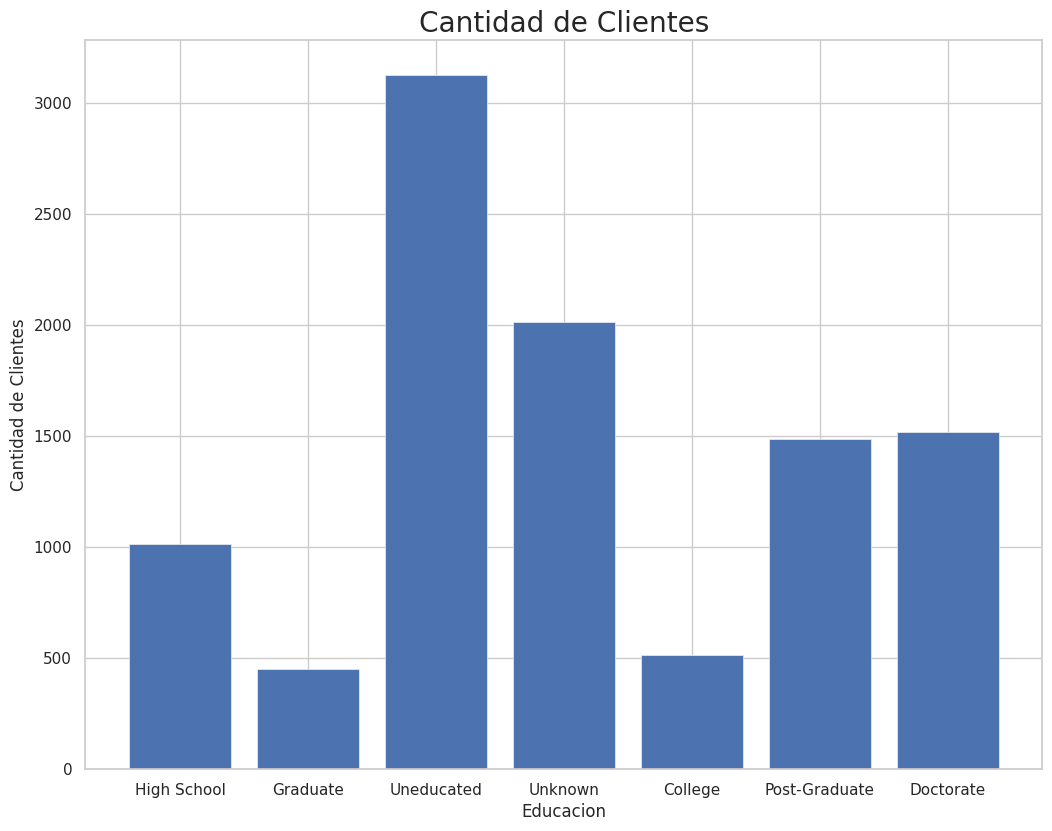

In [ ]:
fig, ax = plt.subplots(figsize=(11, 9))
mlp.style.use('fivethirtyeight')
#ax.bar(eje_x, eje_y, color=["red", "green","blue"])
ax.bar(eje_x, eje_y)
ax.set_title('Cantidad de Clientes')
ax.set_xticks(eje_x)#ticks son los numeros que aparecen abajo 0.5, 1, 2 ,3 etc
ax.set_xlabel('Educacion')
ax.set_ylabel('Cantidad de Clientes')

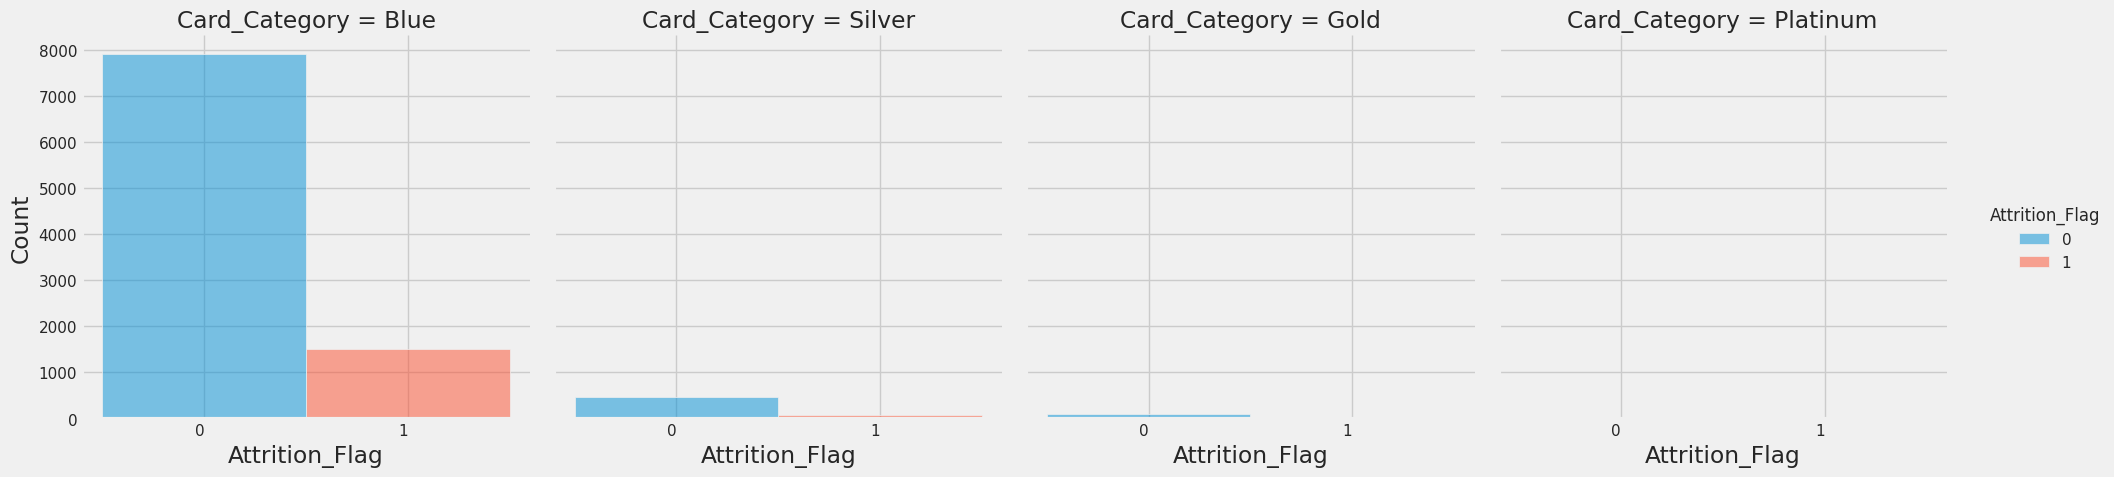

In [ ]:

#Niveles=sns.displot(data=Banco, x='Attrition_Flag', hue='Attrition_Flag', col='Card_Category',col_order=["Blue","Silver","Gold","Platinum"], log_scale=2, binwidth=1)
Niveles = sns.displot(data=Banco, x='Attrition_Flag', hue='Attrition_Flag', col='Card_Category',
                      col_order=["Blue", "Silver", "Gold", "Platinum"],bins=[-0.5, 0.5, 1.5])
# Girar las etiquetas del eje x
for ax in Niveles.axes.flat:
    ax.set_xticks([0, 1])  # Ajustar los ticks del eje x para mostrar solo 0 y 1
    ax.set_xticklabels(['0', '1'], rotation=0, horizontalalignment='right')

plt.show()

Aqui hacemos la compracion de cierre de cuantas o cuentas activas con el tipo de targeta que hay, llegando a la conlcucion como se habia visto en graficos anteriores la mayoria de las personas se concetran el la categoria Blue y ahi es donde vamos a encontrar que hay cierre de cuentas y es bastante mas de 10000

In [ ]:
Banco_4 = Banco[["CLIENTNUM", "Education_Level"]].groupby("Education_Level").count()
Banco_4

,CLIENTNUM
Education_Level,
College,1013
Doctorate,451
Graduate,3128
High School,2013
Post-Graduate,516
Uneducated,1487
Unknown,1519


['Blue' 'Gold' 'Silver' 'Platinum']
['Blue']
0.931766564629209


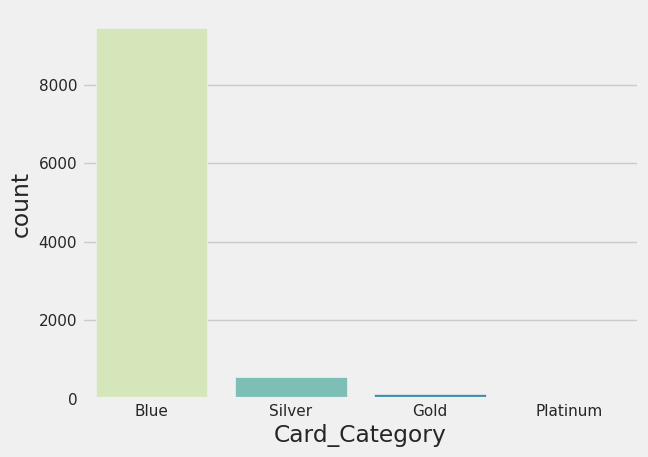

In [ ]:

print(Banco.Card_Category.unique())
sns.countplot(data = Banco, x='Card_Category', order=['Blue', 'Silver', 'Gold', 'Platinum'], palette="YlGnBu" )



print(np.array(Banco.Card_Category.mode()))
print(np.array(Banco.Card_Category.value_counts())[0] / len(Banco))

1438.3 34516.0
530
530


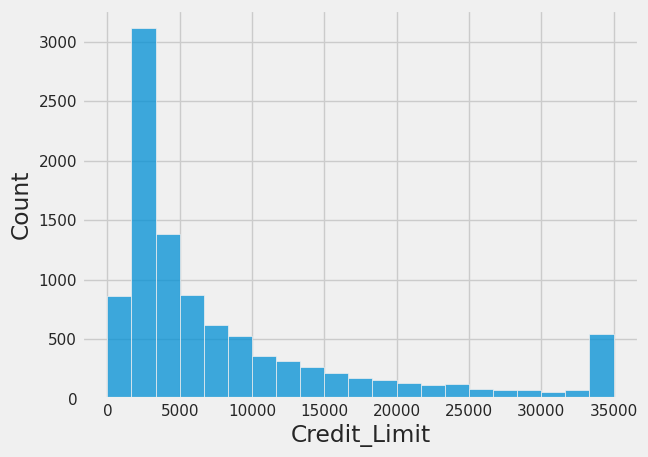

In [ ]:
#
print(Banco.Credit_Limit.min(), Banco.Credit_Limit.max())
sns.histplot(data=Banco, x='Credit_Limit', binrange=(0,35000), palette="YlGnBu", bins=21)


print(Banco[Banco.Credit_Limit > 33750].Credit_Limit.count())
print(Banco[Banco.Credit_Limit > 33750].Credit_Limit.count())#/ len(Banco)

En el grifico podemos ver que el limite de credito es bastente variado y que el maximo que puede llegar es un poco mas de 3000 aun aqui no nos dice el tipo de categoria de trageta, podemos deducir que podria estar en la targeta Blue ya que ahi tenemos el mayor concetrado de clientes.

In [ ]:
import numpy as np
from bokeh.io import show, output_file
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import HoverTool

output_notebook()

data = Banco.Customer_Age.values
data=data[~np.isnan(data)] # data = dataframe de edades sin datos nulos
hist, edges = np.histogram(data, density=False, bins=20)
p = figure(height=300,width=500, title='Histograma de edades')
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")
p.xaxis.axis_label = "Edad"
p.yaxis.axis_label = "Frecuencia"
p.add_tools(HoverTool())
#output_file("hist.html")
show(p)

[Text(1, 0, 'Hombres'), Text(2, 0, 'Mujeres')]

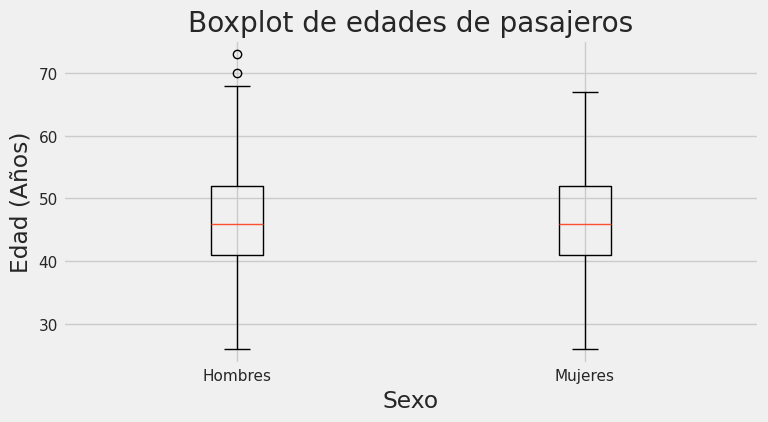

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.boxplot(x=[male, female])
grupos = ['Hombres', 'Mujeres']
ax.set_title('Boxplot de edades de pasajeros')
ax.set_xlabel('Sexo')
ax.set_ylabel('Edad (Años)')
ax.set_xticklabels(grupos)

# **Preprocesamiento de datos**

**Modelo de Regresión Lineal**

In [ ]:
Banco.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_1', 'Naive_Bayes_2'],
      dtype='object')

In [ ]:
model1 = 'Attrition_Flag~Gender'
lm1   = sm.ols(formula = model1, data = Banco).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         Attrition_Flag   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     14.09
Date:                Fri, 16 Aug 2024   Prob (F-statistic):           0.000176
Time:                        16:23:03   Log-Likelihood:                -4217.3
No. Observations:               10127   AIC:                             8439.
Df Residuals:                   10125   BIC:                             8453.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1736      0.005     34.619      

In [ ]:
model1_1 = 'Attrition_Flag~Card_Category'
lm1_1   = sm.ols(formula = model1_1, data = Banco).fit()
print(lm1_1.summary())

                            OLS Regression Results                            
Dep. Variable:         Attrition_Flag   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7446
Date:                Fri, 16 Aug 2024   Prob (F-statistic):              0.525
Time:                        16:23:03   Log-Likelihood:                -4223.2
No. Observations:               10127   AIC:                             8454.
Df Residuals:                   10123   BIC:                             8483.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [ ]:
model2 = 'Attrition_Flag~Customer_Age + Gender'
lm2    = sm.ols(formula = model2, data = Banco).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:         Attrition_Flag   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.608
Date:                Fri, 16 Aug 2024   Prob (F-statistic):           0.000184
Time:                        16:23:03   Log-Likelihood:                -4215.7
No. Observations:               10127   AIC:                             8437.
Df Residuals:                   10124   BIC:                             8459.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1362      0.022      6.270   

In [ ]:
model4 = 'Attrition_Flag~ Credit_Limit+CLIENTNUM + Attrition_Flag + Customer_Age + Gender + Dependent_count + Education_Level + Marital_Status + Income_Category + Card_Category + Months_on_book + Total_Relationship_Count + Months_Inactive_12_mon + Contacts_Count_12_mon + Total_Revolving_Bal'
lm4    = sm.ols(formula = model4, data = Banco).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:         Attrition_Flag   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.336e+17
Date:                Fri, 16 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:23:04   Log-Likelihood:             1.6563e+05
No. Observations:               10127   AIC:                        -3.312e+05
Df Residuals:                   10098   BIC:                        -3.310e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

**Codificación de variables categóricas**

In [ ]:
Banco['Card_Category'].value_counts()

,count
Card_Category,
Blue,9436
Silver,555
Gold,116
Platinum,20


In [ ]:
# Convertir la variable categórica en variables dummy
Banco = pd.get_dummies(Banco, columns=['Gender','Education_Level','Marital_Status','Income_Category','Card_Category'], drop_first=True)
#Banco = pd.get_dummies(Banco, columns=['smoking_status', 'ever_married', 'work_type', 'Residence_type', 'gender'])
#Banco = pd.get_dummies(Banco, columns=['Attrition_Flag'], drop_first=False)
Banco

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,0,45,3,39,5,1,3,12691.0,777,...,False,False,False,True,False,False,False,False,False,False
1,818770008,0,49,5,44,6,1,2,8256.0,864,...,True,False,False,False,False,True,False,False,False,False
2,713982108,0,51,3,36,4,1,0,3418.0,0,...,False,False,False,False,True,False,False,False,False,False
3,769911858,0,40,4,34,3,4,1,3313.0,2517,...,False,True,False,False,False,True,False,False,False,False
4,709106358,0,40,3,21,5,1,0,4716.0,0,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,2,40,3,2,3,4003.0,1851,...,True,False,True,False,False,False,False,False,False,False
10123,710638233,1,41,2,25,4,2,3,4277.0,2186,...,False,False,True,False,False,False,False,False,False,False
10124,716506083,1,44,1,36,5,3,4,5409.0,0,...,False,False,False,False,False,True,False,False,False,False
10125,717406983,1,30,2,36,4,3,3,5281.0,0,...,False,True,True,False,False,False,False,False,False,False


In [ ]:
#features = ['Customer_Age', 'Income_Category', 'Credit_Limit', 'Gender', 'Card_Category']
#target = 'Attrition_Flag'  # Supongamos que esta columna indica si el cliente ha abandonado el banco (variable objetivo)

# Filtrar columnas
#Banco = Banco[features + [target]]

In [ ]:
print(Banco.columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_1', 'Naive_Bayes_2', 'Gender_M',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')


#**Feature Selection**

**Selección de variable objetivo y variables independientes**

In [ ]:
X = Banco.drop(['CLIENTNUM', 'Attrition_Flag','Naive_Bayes_1', 'Naive_Bayes_2','Education_Level_Doctorate', 'Education_Level_Graduate', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown','Months_Inactive_12_mon', 'Education_Level_High School', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver'], axis=1)

#X = Banco.drop(['Card_Category_Blue','Education_Level_Graduate'], axis=1
y = Banco['Attrition_Flag']

In [ ]:
# Variables independientes
X.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Gender_M'],
      dtype='object')

In [ ]:
# Variable dependiente
y.sample(20)

,Attrition_Flag
2066,0
1022,0
9200,1
6636,0
1949,0
3296,0
2675,0
5330,0
9775,0
5257,0


#**Modelos**

##**Modelo de Regresión logistca**

**Librerias necesarias**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

**División de datos en conjuntos de entrenamiento y prueba**

In [ ]:
# Defino datos de entrenamiento (70%) y datos de prueba(30%) .
# Random_state:Establece una semilla de múmeros aleatorios que asegura que el código sea reproducible cada vez que lo corra.
# shuffle=True: Mezcla el orden de los datos para evitar sesgos.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
# Creo el objeto de regresión logistica.
log_reg = LogisticRegression()
# Entreno el modelo con mis datos de entrenamiento
log_reg.fit(X_train, y_train)

# Instanciar el modelo y entrenar
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2543
           1       0.65      0.36      0.46       496

    accuracy                           0.86      3039
   macro avg       0.77      0.66      0.69      3039
weighted avg       0.85      0.86      0.85      3039



Matriz de confusión:
[[2449   94]
 [ 319  177]]


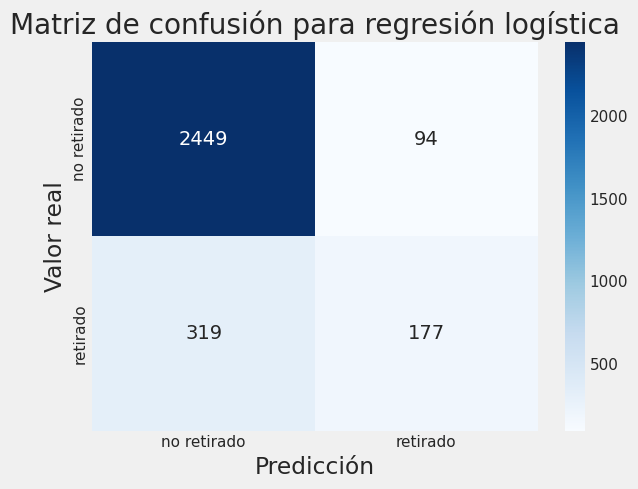

In [ ]:
# Creamos la matriz de confusion
confusion_mtx = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion_mtx)

# Crear el heatmap
g = sns.heatmap(confusion_mtx, annot=True, cmap='Blues', fmt='d')

# Ajustar las etiquetas del eje x e y
g.set(title='Matriz de confusión para regresión logística', ylabel ='Valor real', xlabel='Predicción')
g.set_xticklabels(['no retirado', 'retirado'])
g.set_yticklabels(['no retirado', 'retirado'])

plt.show()

**Conclusión sobre el modelado y las metricas**

Tenomos buenas predicciones aun que tambien nuestro modelo no a dectecta varias, pero haciendo estadistica nustro modelo es bastente bueno pra podeer precedir si es que un cliente dejara o cerrara su cuenta.

##**Modelo de Arbol**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
# Inicializar y ajustar el modelo de árbol de decisión
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Realizar predicciones
y_pred_tree = decision_tree.predict(X_test)

# Evaluar el modelo
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("\nDecisionTreeRegressor:")
print(f"Error Cuadrático Medio (MSE): {mse_tree}")
print(f"Coeficiente de Determinación (R^2): {r2_tree}")


DecisionTreeRegressor:
Error Cuadrático Medio (MSE): 0.07337940111878907
Coeficiente de Determinación (R^2): 0.4627115230931208


In [ ]:
# Inicializar y ajustar el modelo de bosque aleatorio
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Realizar predicciones
y_pred_forest = random_forest.predict(X_test)

# Evaluar el modelo
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print("\RandomForestRegressor:")
print(f"Error Cuadrático Medio (MSE): {mse_forest}")
print(f"Coeficiente de Determinación (R^2): {r2_forest}")

\RandomForestRegressor:
Error Cuadrático Medio (MSE): 0.0328033892727871
Coeficiente de Determinación (R^2): 0.759811571217003


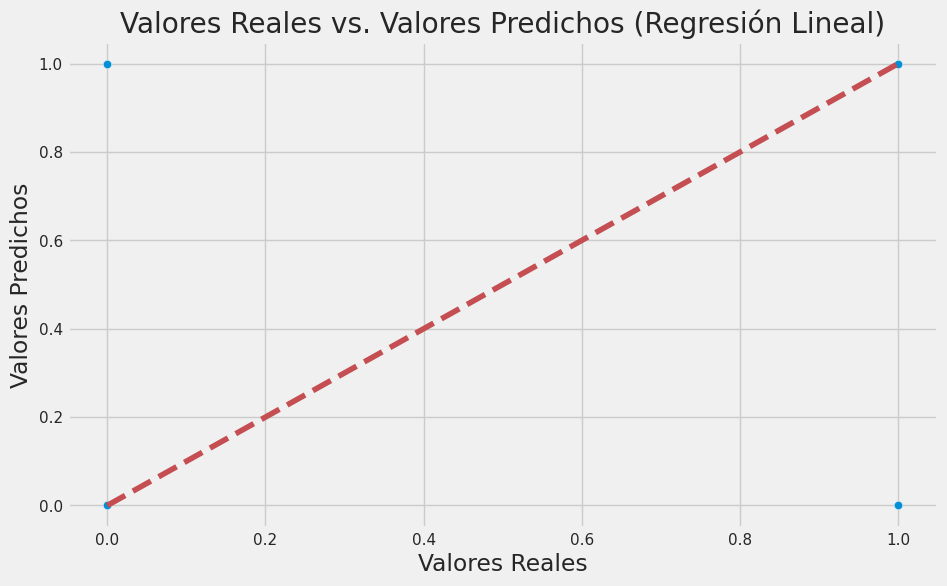

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión de valores reales vs. valores predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos (Regresión Lineal)')
plt.show()

El modelo de arbol no nos ayuda ya que solo tenemos valores en el cierre de cuentas(Attrition_Flag) de 0 y 1 por lo cual no onos pude dar la grafica de los valores reales vs los predichos.

#**Conclusión Final**

Como podemos observar tenemos buenos resultados en cuanto a las predicciones en el modelo ode regresioon lineal, aunque en nuestro modelo en este caso esta solo utilizando datos de las transacciones de nuestra targeta como movimientos, si estamos inactivos, compras, etc.

Nuestro modelo a logrado el objetivo de podernos predecir el numero de cierre de cuentas en base a los datos unicos referentes a la targeta, pero tambien podriamos darle aun mas datos o cambierlos por datos mas personales y ver como se comporta el modelo y quienes son las personas que cerrarian sus cuentas ya sea por motivo de muchos dependientes familiares o ingreso,etc.

(En un caso hipotetico si quisieramos saber porque estan cerrando sus cuentas temdriamos que incorporar una columna de quejas esto ayudaria)
